<a href="https://colab.research.google.com/github/NIKHIL4053/Financial_Analytics_/blob/main/Financial_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("Financial Analytics data.csv")

# Summary statistics
summary_stats = data[['Mar Cap - Crore', 'Sales Qtr - Crore']].describe()
print(summary_stats)


       Mar Cap - Crore  Sales Qtr - Crore
count       479.000000         365.000000
mean      28043.857119        4395.976849
std       59464.615831       11092.206185
min        3017.070000          47.240000
25%        4843.575000         593.740000
50%        9885.050000        1278.300000
75%       23549.900000        2840.750000
max      583436.720000      110666.930000


In [5]:
# Correlation analysis
correlation = data[['Mar Cap - Crore', 'Sales Qtr - Crore']].corr()
print(correlation)


                   Mar Cap - Crore  Sales Qtr - Crore
Mar Cap - Crore           1.000000           0.620702
Sales Qtr - Crore         0.620702           1.000000


In [6]:
# Top companies by Market Cap
top_companies = data.sort_values(by='Mar Cap - Crore', ascending=False).head(10)
print(top_companies[['Name', 'Mar Cap - Crore']])


             Name  Mar Cap - Crore
0  Reliance Inds.        583436.72
1             TCS        563709.84
2       HDFC Bank        482953.59
3             ITC        320985.27
4         H D F C        289497.37
5  Hind. Unilever        288265.26
6   Maruti Suzuki        263493.81
7         Infosys        248320.35
8         O N G C        239981.50
9  St Bk of India        232763.33


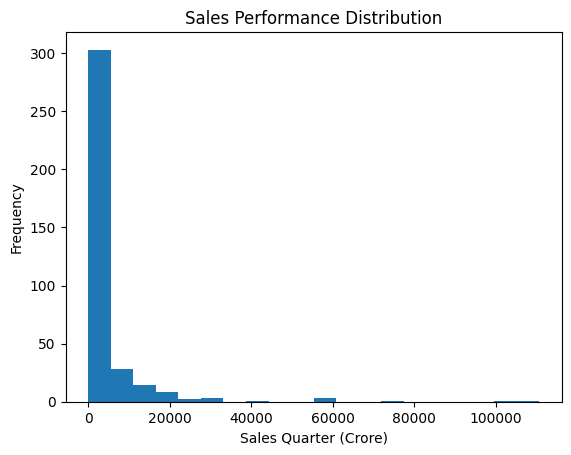

In [7]:
# Sales performance distribution
plt.hist(data['Sales Qtr - Crore'], bins=20)
plt.xlabel('Sales Quarter (Crore)')
plt.ylabel('Frequency')
plt.title('Sales Performance Distribution')
plt.show()


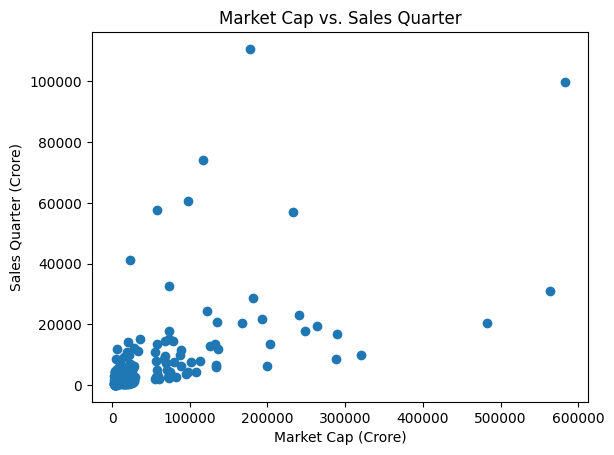

In [8]:
# Market Cap vs. Sales Quarter
plt.scatter(data['Mar Cap - Crore'], data['Sales Qtr - Crore'])
plt.xlabel('Market Cap (Crore)')
plt.ylabel('Sales Quarter (Crore)')
plt.title('Market Cap vs. Sales Quarter')
plt.show()


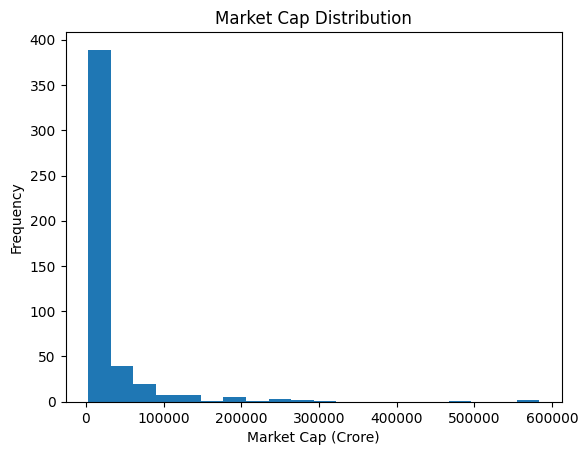

In [9]:
# Market Cap distribution
plt.hist(data['Mar Cap - Crore'], bins=20)
plt.xlabel('Market Cap (Crore)')
plt.ylabel('Frequency')
plt.title('Market Cap Distribution')
plt.show()


In [10]:
# Company Size vs. Sales Performance
average_sales_by_size = data.groupby(pd.cut(data['Mar Cap - Crore'], bins=5))['Sales Qtr - Crore'].mean()
print(average_sales_by_size)


Mar Cap - Crore
(2436.65, 119101.0]        2934.514971
(119101.0, 235184.93]     25311.182143
(235184.93, 351268.86]    15879.268333
(351268.86, 467352.79]             NaN
(467352.79, 583436.72]    50431.756667
Name: Sales Qtr - Crore, dtype: float64


In [11]:
# Market Cap quartiles analysis
market_cap_quartiles = pd.qcut(data['Mar Cap - Crore'], q=4)
sales_by_quartile = data.groupby(market_cap_quartiles)['Sales Qtr - Crore'].mean()
print(sales_by_quartile)


Mar Cap - Crore
(3017.069, 4843.575]      941.838052
(4843.575, 9885.05]      1314.472589
(9885.05, 23549.9]       2653.834255
(23549.9, 583436.72]    13845.471585
Name: Sales Qtr - Crore, dtype: float64


In [12]:
# Outlier detection
outliers = data[(data['Mar Cap - Crore'] > data['Mar Cap - Crore'].quantile(0.95)) | (data['Sales Qtr - Crore'] > data['Sales Qtr - Crore'].quantile(0.95))]
print(outliers[['Name', 'Mar Cap - Crore', 'Sales Qtr - Crore']])


                 Name  Mar Cap - Crore  Sales Qtr - Crore
0      Reliance Inds.        583436.72           99810.00
1                 TCS        563709.84           30904.00
2           HDFC Bank        482953.59           20581.27
3                 ITC        320985.27            9772.02
4             H D F C        289497.37           16840.51
5      Hind. Unilever        288265.26            8590.00
6       Maruti Suzuki        263493.81           19283.20
7             Infosys        248320.35           17794.00
8             O N G C        239981.50           22995.88
9      St Bk of India        232763.33           57014.08
10         ICICI Bank        203802.35           13665.35
11    Kotak Mah. Bank        199253.77            6390.71
12         Coal India        192677.98           21643.28
13    Larsen & Toubro        180860.74           28747.45
14            I O C L        178017.48          110666.93
15      Bharti Airtel        167131.29           20318.60
16          Ax